In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [4]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
scaled_df.head()

,cgpa,package
0,0.494361,0.581538
1,0.161654,0.187692
2,0.669173,0.578462
3,0.593985,0.707692
4,0.503759,0.676923


In [5]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

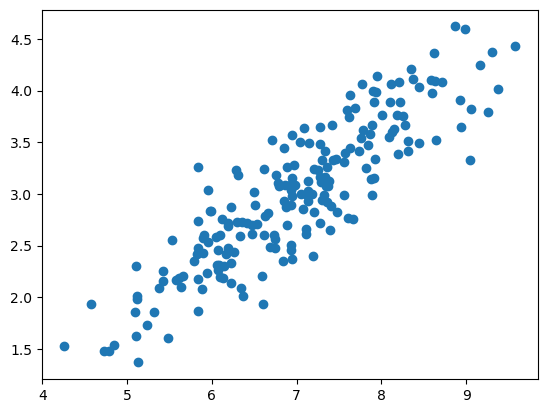

In [6]:
plt.scatter(X,y)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [8]:
X_train.shape[0]

160

In [9]:
import numpy as np

class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.lr = learning_rate
        self.epochs = epochs
        self.m = 0.0
        self.b = 0.0
        self.loss_history = []

    def fit(self, X, y):

        X = X.ravel().astype(float)
        y = y.ravel().astype(float)
        n = len(X)

        for _ in range(self.epochs):
            y_pred = self.m * X + self.b
            error  = y - y_pred

            # MSE
            loss = (1/n) * np.sum(error**2)
            self.loss_history.append(loss)

            #gradients
            d_m = (-2/n) * np.sum(X * error)
            d_b = (-2/n) * np.sum(error)

            self.m -= self.lr * d_m
            self.b -= self.lr * d_b

    def predict(self, X):
        X = X.ravel().astype(float)
        return self.m * X + self.b

    def coeff_(self):
        print(self.m)

    def intercept_(self):
        print(self.b)


In [10]:
gd = GDRegressor(0.01, 9000)
gd.fit(X_train, y_train)

gd.coeff_()
gd.intercept_()


0.557716714987797
-0.9113115423651251


Text(0, 0.5, 'Package(in lpa)')

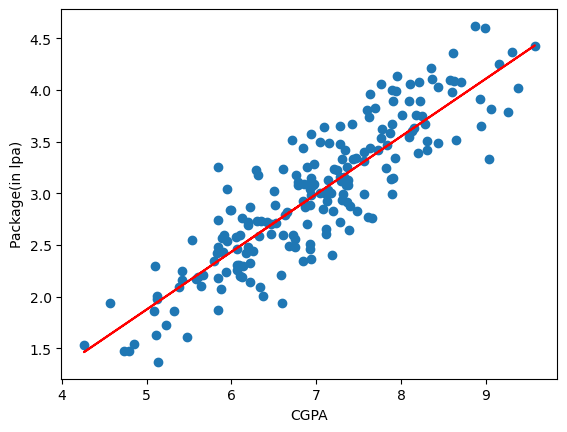

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X,gd.predict(X),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7968152537077317

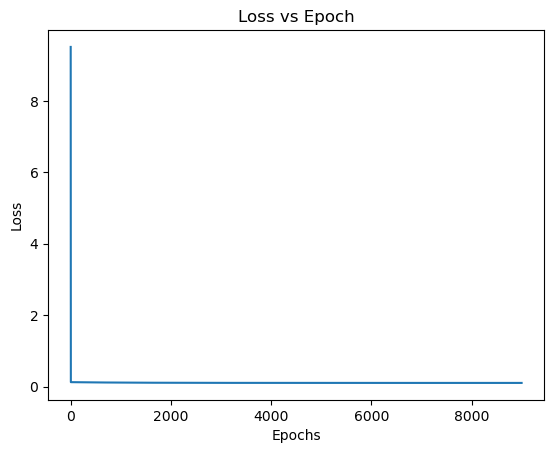

In [15]:
plt.plot(gd.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

In [13]:
print("first 5:", gd.loss_history[:10])
print("last 5 :", gd.loss_history[-5:])

first 5: [np.float64(9.510680625), np.float64(0.1351788818846852), np.float64(0.12646730007442744), np.float64(0.12644084115524679), np.float64(0.1264224510579632), np.float64(0.12640408420138827), np.float64(0.1263857331119482), np.float64(0.12636739776920236), np.float64(0.12634907815963245), np.float64(0.12633077426973816)]
last 5 : [np.float64(0.10502735857263634), np.float64(0.10502735040645983), np.float64(0.10502734224729059), np.float64(0.10502733409512251), np.float64(0.10502732594994968)]


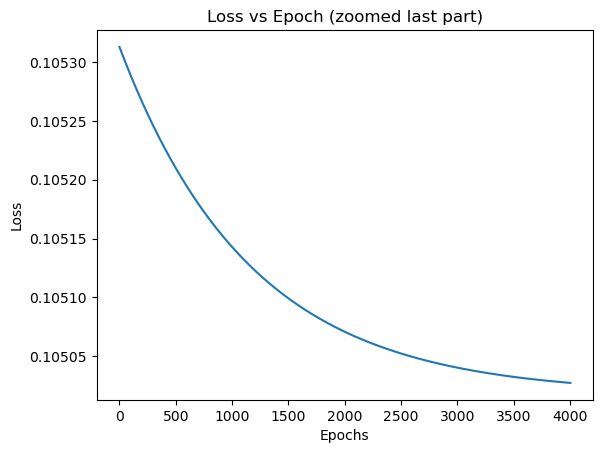

In [14]:
plt.plot(gd.loss_history[4995:])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epoch (zoomed last part)")
plt.show()


In [16]:
lr = LinearRegression()

In [17]:
lr.fit(X_train.reshape(-1, 1),y_train.reshape(-1, 1))

LinearRegression()

In [18]:
lr.coef_

array([[0.56061349]])

In [19]:
lr.intercept_

array([-0.93212613])

In [20]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7968152537077317

Text(0, 0.5, 'Package(in lpa)')

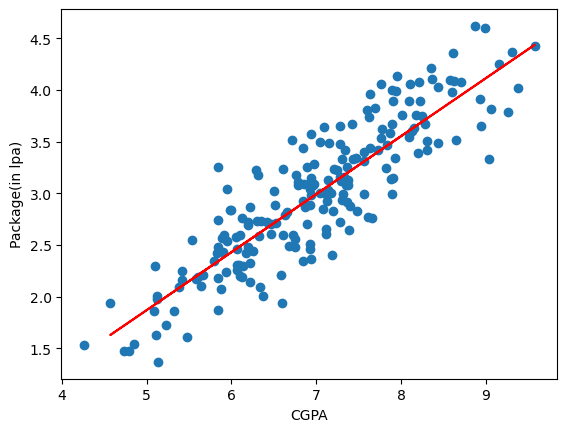

In [21]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train.reshape(-1, 1)),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')